In [2]:
#This notebook is intended to design/test chess representations for their use in training Basilisk
import chess #python-chess and python in general is not optimal for creating chess engines, but the goal of this project
# is to produce a chess Neural Network that is high performing. Thus, we will mainly be testing the neural network rather than
# optimizing some kind of tree search.
import numpy as np
import env

import keras
from keras.models import Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Concatenate, Dropout, AlphaDropout, Lambda
from keras.layers import GlobalAveragePooling2D, Multiply, Permute, Reshape
from keras.optimizers import SGD
from keras.initializers import glorot_uniform
from keras.regularizers import l1, l2
from keras import backend as K
import tensorflow as tf

def load_model(modelFile, weightFile, update=True): #load model from json and HDF5
    import keras
    from keras.models import model_from_json


    json_file = open(modelFile, 'r')
    load_model_json = json_file.read()
    json_file.close()
    if not update:
        load_model = model_from_json(load_model_json)
    else:
        _, _, _, load_model, _, _ = create_model(64, resblocks=5)
        load_model.summary()
    load_model.load_weights(weightFile)
    print("Model Loaded!")
    return load_model

In [3]:
m1 = load_model("TinyBasilisk.json", "TinyBasilisk.h5", update=False)
m1.summary()
m2 = load_model("Basilisk.json", "Basilisk.h5", update=False)
m2.summary()






Model Loaded!
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 8, 8, 17)     0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 1088)         0           input_1[0][0]                    
__________________________________________________________________________________________________
latentspace (Dense)             (None, 64)           69696       flatten_1[0][0]                  
__________________________________________________________________________________________________
fcPolicy (Dense)                (None, 1968)         127920      latentspace[0][0]                
__________________________________________________________________________________________

In [ ]:
def human_move(board):
    try:
        san = input("Move: ")
        board.push_san(san)
    except:
        print("Invalid Move")
        human_move(board)

In [ ]:
import chess.svg
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
#Simulate Game
board = chess.Board()
eval_graph = []
move_dict = env.generate_move_dict()

while not board.is_game_over():
    display(board)
    plt.plot(eval_graph)
    plt.show()
    
    if board.turn:
        print("Legal Moves")
        for move in board.legal_moves:
            san = board.san(move)
            print(san)
        human_move(board)
    else:
        position = env.convert(board)
        position = np.reshape(position, [-1, 8, 8, 17])
        policy, value = model.predict(position)
        policy = np.squeeze(policy)
        eval_graph.append(np.squeeze(value))
        #Implement tau
        mask = env.fast_bitmask(board, move_dict)
        policy = policy * mask
        policy = policy/np.sum(policy)
        index = np.random.choice(1968, p=policy)

        board.push_uci(env.MOVES[index])
    
    clear_output(wait=True)
    
plt.plot(eval_graph)
plt.show()
display(board)

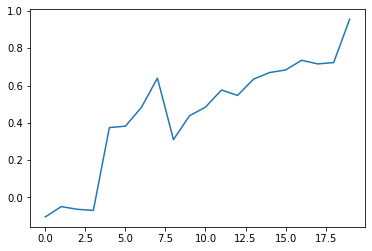

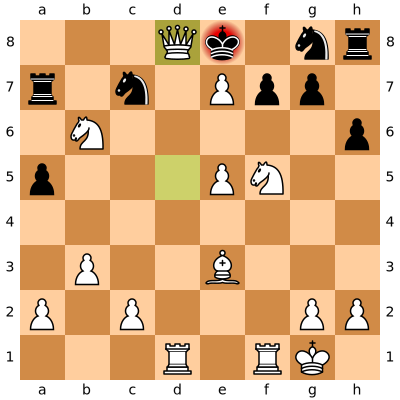

In [5]:
plt.plot(eval_graph)
plt.show()
display(board)